In [1]:
import mlrose_hiive as mh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [418]:
# Four Peak
fitness = mh.FourPeaks(t_pct=0.15)
problem = mh.DiscreteOpt(length=8, fitness_fn=fitness, maximize=True)

In [380]:
# create a runner class and solve the problem
sa = mh.SARunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None, 
              seed=12345,
              iteration_list=5*np.arange(20),
              max_attempts=500,
              temperature_list=[0.5],
              decay_list=[mh.GeomDecay])

# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [381]:
ga = mh.GARunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None, 
              seed=12345,
              iteration_list=5*np.arange(20),
              max_attempts=500,
              population_sizes=[50],
              mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga, df_run_curves_ga = ga.run()

In [419]:
rhc = mh.RHCRunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None,
              seed=12345,
              iteration_list=5*np.arange(20),
              max_attempts=500,
              restart_list=[3])

# the two data frames will contain the results
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [293]:
# create a runner class and solve the problem
mmc = mh.MIMICRunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=12345,
              iteration_list=5*np.arange(20),
              max_attempts=500,
              population_sizes=[50],
              keep_percent_list=[0.2])

# the two data frames will contain the results
df_run_stats_mmc, df_run_curves_mmc = mmc.run()

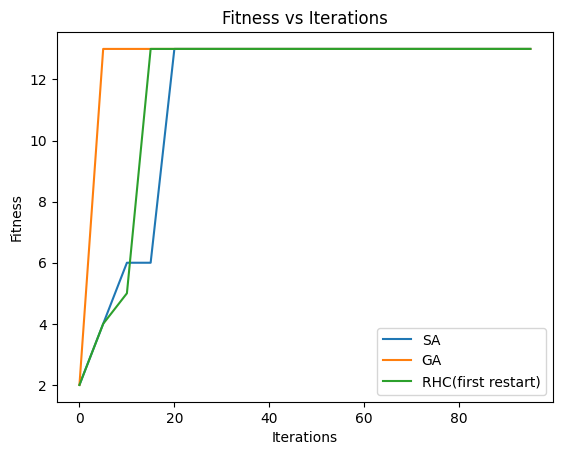

In [420]:
# Fitness/iterations
plt.plot(df_run_stats_sa['Iteration'],df_run_stats_sa['Fitness'], label='SA')
plt.plot(df_run_stats_ga['Iteration'],df_run_stats_ga['Fitness'], label='GA')
plt.plot(df_run_stats_rhc.loc[:19,'Iteration'],df_run_stats_rhc.loc[:19,'Fitness'], label='RHC(first restart)')
# plt.plot(df_run_stats_mmc['Iteration'],df_run_stats_mmc['Fitness'], label='MIMIC')
plt.title("Fitness vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("Plots/iteration_vs_fitness.png")

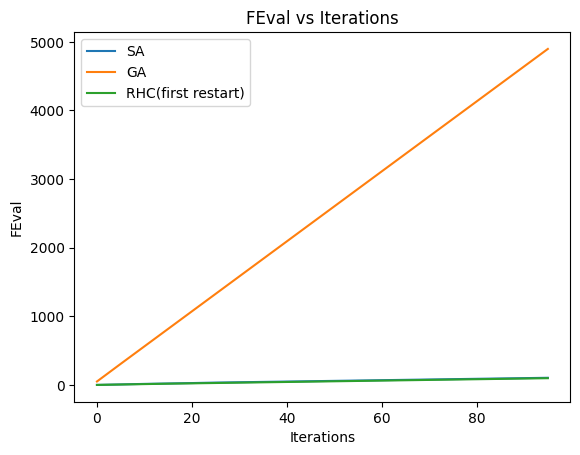

In [421]:
# FEVAL / ITERATIONS
plt.plot(df_run_stats_sa['Iteration'],df_run_stats_sa['FEvals'], label='SA')
plt.plot(df_run_stats_ga['Iteration'],df_run_stats_ga['FEvals'], label='GA')
plt.plot(df_run_stats_rhc.loc[:19,'Iteration'],df_run_stats_rhc.loc[:19,'FEvals'], label='RHC(first restart)')
# plt.plot(df_run_stats_mmc['Iteration'],df_run_stats_mmc['FEvals'], label='MIMIC')
plt.title("FEval vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("FEval")
plt.legend()
plt.savefig("Plots/feval_vs_iterations.png")

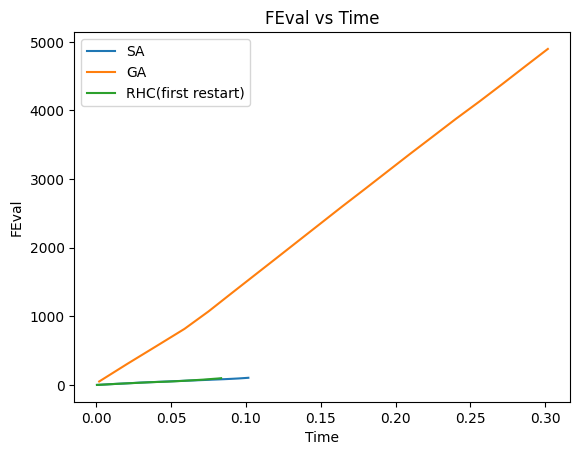

In [422]:
# FEVAL / Time
plt.plot(df_run_stats_sa['Time'],df_run_stats_sa['FEvals'], label='SA')
plt.plot(df_run_stats_ga['Time'],df_run_stats_ga['FEvals'], label='GA')
plt.plot(df_run_stats_rhc.loc[:19,'Time'],df_run_stats_rhc.loc[:19,'FEvals'], label='RHC(first restart)')
# plt.plot(df_run_stats_mmc['Time'],df_run_stats_mmc['FEvals'], label='MIMIC')
plt.title("FEval vs Time")
plt.xlabel("Time")
plt.ylabel("FEval")
plt.legend()
plt.savefig("Plots/feval_vs_time.png")

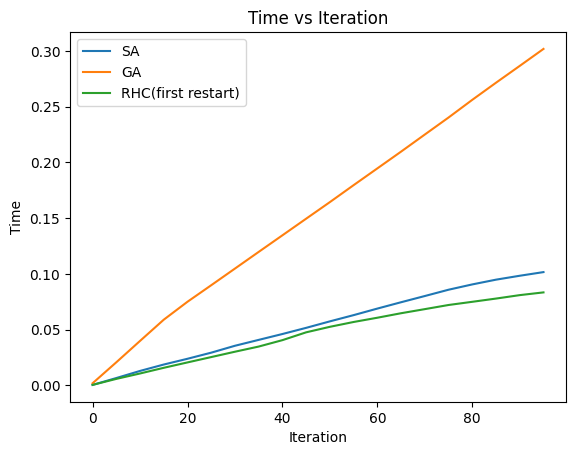

In [423]:
# Time / Iteration
plt.plot(df_run_stats_sa['Iteration'],df_run_stats_sa['Time'], label='SA')
plt.plot(df_run_stats_ga['Iteration'],df_run_stats_ga['Time'], label='GA')
plt.plot(df_run_stats_rhc.loc[:19,'Iteration'],df_run_stats_rhc.loc[:19,'Time'], label='RHC(first restart)')
# plt.plot(df_run_stats_mmc['Time'],df_run_stats_mmc['Iteration'], label='MIMIC')
plt.title("Time vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Time")
plt.legend()
plt.savefig("Plots/iterations_vs_time.png")

In [431]:
# Final Results

print("Final fitness for SA: ", df_run_curves_sa.iloc[-1]['Fitness'])
print("Best fitness for SA: ", df_run_curves_sa['Fitness'].max())
print("Time to reach best fitness for SA: ", df_run_curves_sa.loc[df_run_curves_sa['Fitness'] == df_run_curves_sa['Fitness'].max(),'Time'].min())
print("Iterations to reach best fitness for SA: ", df_run_curves_sa.loc[df_run_curves_sa['Fitness'] == df_run_curves_sa['Fitness'].max(),'Iteration'].min())
print("Total Time for SA: ", df_run_curves_sa.iloc[-1]['Time'])
print("Total FEvals for SA: ", df_run_curves_sa.iloc[-1]['FEvals'])
print()
print("Final fitness for GA: ", df_run_curves_ga.iloc[-1]['Fitness'])
print("Best fitness for GA: ", df_run_curves_ga['Fitness'].max())
print("Time to reach best fitness for GA: ", df_run_curves_ga.loc[df_run_curves_ga['Fitness'] == df_run_curves_ga['Fitness'].max(),'Time'].min())
print("Iteration to reach best fitness for GA: ", df_run_curves_ga.loc[df_run_curves_ga['Fitness'] == df_run_curves_ga['Fitness'].max(),'Iteration'].min())
print("Total Time for GA: ", df_run_curves_ga.iloc[-1]['Time'])
print("Total FEvals for GA: ", df_run_curves_ga.iloc[-1]['FEvals'])
print()
print("Final fitness for RHC: ", df_run_curves_rhc.iloc[-1]['Fitness'])
print("Best fitness for RHC: ", df_run_curves_rhc['Fitness'].max())
print("Time to reach best fitness for RHC: ", df_run_curves_rhc.loc[df_run_curves_rhc['Fitness'] == df_run_curves_rhc['Fitness'].max(),'Time'].min())
print("Iteration to reach best fitness for RHC: ", df_run_curves_rhc.loc[df_run_curves_rhc['Fitness'] == df_run_curves_rhc['Fitness'].max(),'Iteration'].min())
print("Total Time for RHC: ", df_run_stats_rhc.iloc[-1]['Time'])
print("Total FEvals for RHC: ", df_run_stats_rhc.iloc[-1]['FEvals'])
print()


Final fitness for SA:  13.0
Best fitness for SA:  13.0
Time to reach best fitness for SA:  0.023797400062903762
Iterations to reach best fitness for SA:  20
Total Time for SA:  0.10158430004958063
Total FEvals for SA:  104.0

Final fitness for GA:  13.0
Best fitness for GA:  13.0
Time to reach best fitness for GA:  0.013153899926692247
Iteration to reach best fitness for GA:  3
Total Time for GA:  0.30189499992411584
Total FEvals for GA:  4897.0

Final fitness for RHC:  8.0
Best fitness for RHC:  13.0
Time to reach best fitness for RHC:  0.01542349997907877
Iteration to reach best fitness for RHC:  13
Total Time for RHC:  0.20140679995529354
Total FEvals for RHC:  394



In [392]:
# Fitness / Problem Size
problem_sizes = [10, 20, 40, 80]
df_run_stats = []
df_run_curves = []
for size in problem_sizes:
    problem = mh.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
    sa = mh.SARunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None, 
              seed=12345,
              iteration_list=50*np.arange(60),
              max_attempts=1000,
              temperature_list=[2.5],
              decay_list=[mh.GeomDecay])
    ga = mh.GARunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None, 
              seed=12345,
              iteration_list=50*np.arange(60),
              max_attempts=1000,
              population_sizes=[50],
              mutation_rates=[0.5])
    rhc = mh.RHCRunner(problem=problem,
              experiment_name='4_peaks',
              output_directory=None,
              seed=12345,
              iteration_list=50*np.arange(60),
              max_attempts=1000,
              restart_list=[5])
    # mmc = mh.MIMICRunner(problem=problem,
    #           experiment_name='4_peaks',
    #           output_directory=None, # note: specify an output directory to have results saved to disk
    #           seed=12345,
    #           iteration_list=50*np.arange(60),
    #           max_attempts=1000,
    #           population_sizes=[150],
    #           keep_percent_list=[0.5])
    sa_status, sa_curve = sa.run()
    ga_status, ga_curve = ga.run()
    rhc_status, rhc_curve = rhc.run()
    # mmc_status, mmc_curve = mmc.run()
    
    df_run_stats.append(sa_status)
    df_run_stats.append(ga_status)
    df_run_stats.append(rhc_status)
    # df_run_stats.append(mmc_status)

    df_run_curves.append(sa_curve)
    df_run_curves.append(ga_curve)
    df_run_curves.append(rhc_curve)
    # df_run_curves.append(mmc_curve)

In [393]:
# Fitness / size
sa_idx = [0,3,6,9]
ga_idx = [1,4,7,10]
rhc_idx = [2,5,8,11]
# mmc_idx = [3,7,11,15]


In [457]:
def various_size(idx_list, rhc=False):
    fitnesses = []
    wall_clock_times = []
    fevals = []
    time_to_reach_best = []
    iter_to_reach_best = []
    
    for idx in idx_list:
        status = df_run_stats[idx]
        curves = df_run_curves[idx]
        fitness = curves.iloc[-1]['Fitness']
        time = status.iloc[-1]['Time']
        feval = status.iloc[-1]['FEvals']
        best_fitness = curves['Fitness'].max()
        min_time = curves.loc[curves['Fitness'] == best_fitness, 'Time'].min()
        min_iteration = curves.loc[curves['Fitness'] == best_fitness,'Iteration'].min()
        if rhc:
            current_restart = curves.loc[curves['Fitness'] == best_fitness, 'current_restart'].iloc[0]
            if current_restart > 0:
                min_time += curves.loc[curves['current_restart'] == current_restart-1, 'Time'].iloc[-1]
    
        fitnesses.append(fitness)
        wall_clock_times.append(time)
        fevals.append(feval)
        time_to_reach_best.append(min_time)
        iter_to_reach_best.append(min_iteration)
    return fitnesses, wall_clock_times, fevals, time_to_reach_best, iter_to_reach_best

In [458]:
fitnesses_sa, wall_clock_times_sa, fevals_sa, time_reach_best_sa, iter_reach_best_sa = various_size(sa_idx)
fitnesses_ga, wall_clock_times_ga, fevals_ga, time_reach_best_ga, iter_reach_best_ga = various_size(ga_idx)
fitnesses_rhc, wall_clock_times_rhc, fevals_rhc, time_reach_best_rhc, iter_reach_best_rhc = various_size(rhc_idx, rhc=True)
# fitnesses_mmc, wall_clock_times_mmc, fevals_mmc, time_reach_best_mmc, iter_reach_best_mmc = various_size(mmc_idx)

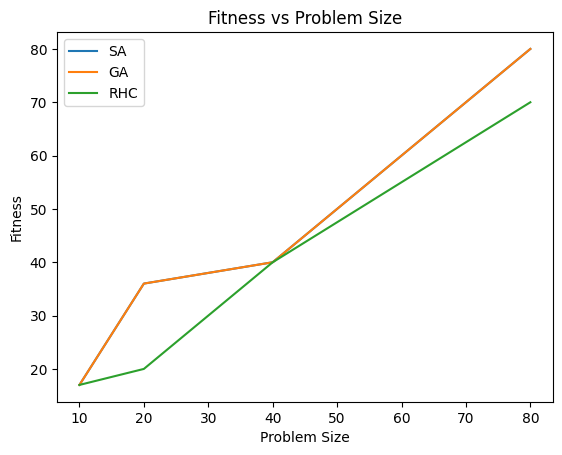

In [460]:
# Fitness/size
plt.plot(problem_sizes,fitnesses_sa, label='SA')
plt.plot(problem_sizes,fitnesses_ga, label='GA')
plt.plot(problem_sizes,fitnesses_rhc, label='RHC')
# plt.plot(problem_sizes,fitnesses_mmc, label='MIMIC')
plt.title("Fitness vs Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("Plots/fitness_vs_size.png")

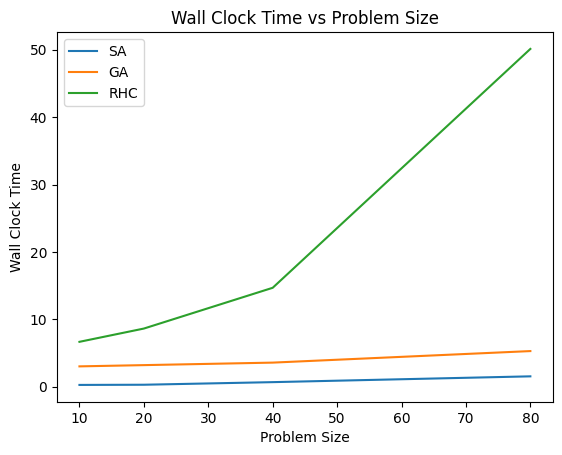

In [461]:
# time/size
plt.plot(problem_sizes,wall_clock_times_sa, label='SA')
plt.plot(problem_sizes,wall_clock_times_ga, label='GA')
plt.plot(problem_sizes,wall_clock_times_rhc, label='RHC')
# plt.plot(problem_sizes,wall_clock_times_mmc, label='MIMIC')
plt.title("Wall Clock Time vs Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Wall Clock Time")
plt.legend()
plt.savefig("Plots/time_vs_size.png")

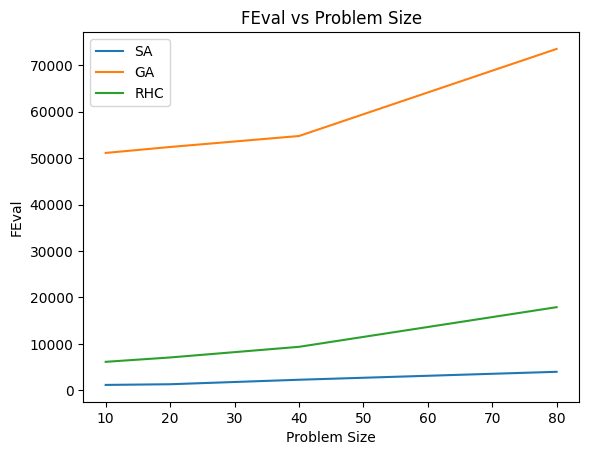

In [462]:
# feval/size
plt.plot(problem_sizes,fevals_sa, label='SA')
plt.plot(problem_sizes,fevals_ga, label='GA')
plt.plot(problem_sizes,fevals_rhc, label='RHC')
# plt.plot(problem_sizes,fevals_mmc, label='MIMIC')
plt.title("FEval vs Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("FEval")
plt.legend()
plt.savefig("Plots/feval_vs_size.png")

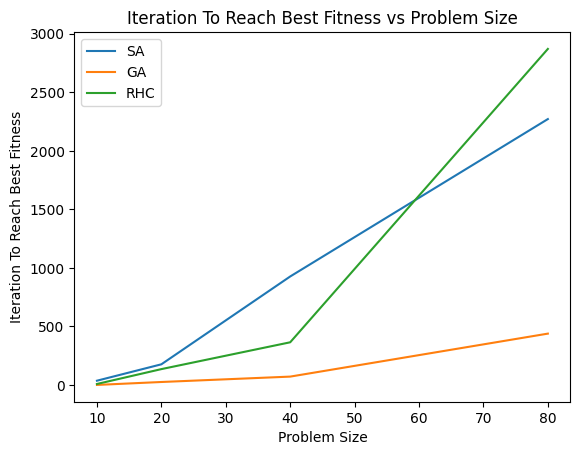

In [463]:
# iter-reach-best-fit / size
plt.plot(problem_sizes,iter_reach_best_sa, label='SA')
plt.plot(problem_sizes,iter_reach_best_ga, label='GA')
plt.plot(problem_sizes,iter_reach_best_rhc, label='RHC')
# plt.plot(problem_sizes,iter_reach_best_mmc, label='MIMIC')
plt.title("Iteration To Reach Best Fitness vs Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Iteration To Reach Best Fitness")
plt.legend()
plt.savefig("Plots/miniter_vs_size.png")

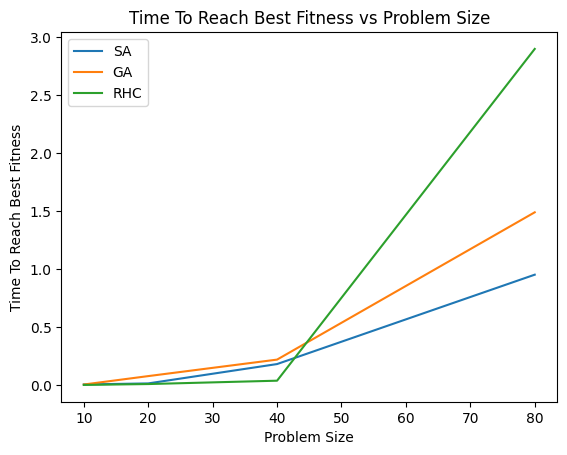

In [464]:
# time-reach-best-fit / size
plt.plot(problem_sizes,time_reach_best_sa, label='SA')
plt.plot(problem_sizes,time_reach_best_ga, label='GA')
plt.plot(problem_sizes,time_reach_best_rhc, label='RHC')
# plt.plot(problem_sizes,time_reach_best_mmc, label='MIMIC')
plt.title("Time To Reach Best Fitness vs Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Time To Reach Best Fitness")
plt.legend()
plt.savefig("Plots/mintime_vs_size.png")